1: Getting and setting up the data.

2: Visualizing current data.

3: The mathematics behind the Least Squares Method.

4: Using Numpy for a Univariate Linear Regression.

5: Getting the error.

6: Using scikit learn to implement a multivariate regression.

7: Using Training and Validation.  

8: Predicting Prices

9: Residual Plots

### 1. Getting and setting up the data

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# setting a white grid style for seaborn
sns.set_style('whitegrid')

# to ensure that we can see the plot
%matplotlib inline

In [3]:
# import boston dataset from in-built scikit-learn datasets 
from sklearn.datasets import load_boston

In [4]:
# load boston dataset
boston = load_boston()

In [6]:
# .DESCR is a built-in method to describe the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Text(0, 0.5, 'Number of houses')

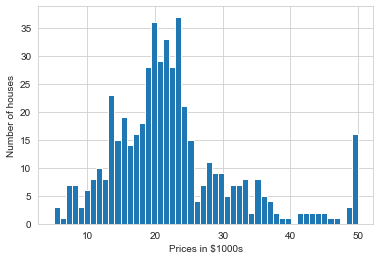

In [7]:
# As mentioned in the data set characteristic, Median value usually is
# the target
plt.hist(boston.target, bins=50)
plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

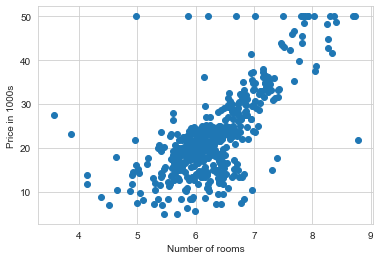

In [9]:
# [:, 5] means, we want every attributes in the fifth column/index. 
# Why fifth? because the average number of room i.e. RM is 6th column
# as mentioned in the data set characteristics. since these attributes
# are represented in order. RM is at 5th index position; starting from 0

# x-axis is the average number of room and y-axis is the price
plt.scatter(boston.data[:, 5], boston.target)
plt.ylabel('Price in 1000s')
plt.xlabel('Number of rooms')

Text(0, 0.5, 'Price in 1000s')

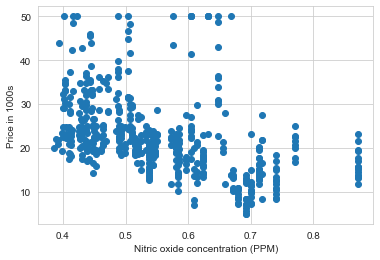

In [11]:
plt.scatter(boston.data[:, 4], boston.target)
plt.xlabel('Nitric oxide concentration (PPM)')
plt.ylabel('Price in 1000s')

In [15]:
boston_df = DataFrame(boston.data)

# .feature_name .data .target are functions that are specific to the
# dataset available with scikit-learn
boston_df.columns = boston.feature_names
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
# create one extra column for the target of the boston data set i.e price
boston_df['Price'] = boston.target

In [19]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


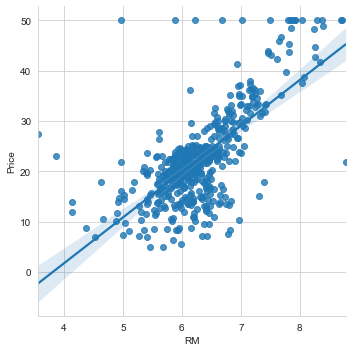

In [20]:
# plotting scatter plot using seaborn lmplot
sns.lmplot('RM', 'Price', data=boston_df)